In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Laksh\OneDrive\Desktop\aiml\data.csv")

In [3]:
null_var = df.isnull().sum()/df.shape[0]*100

In [4]:
drop_columns = null_var[null_var>20].keys()
drop_columns

Index(['Method', 'Player Out', 'Runs to Get', 'Player Out Runs',
       'Player Out Balls Faced'],
      dtype='object')

In [5]:
df2_drop_clm = df.drop(columns = drop_columns)

In [6]:
df2_drop_clm.shape

(239693, 30)

In [7]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [8]:
df2_drop_clm.head(6)

,Unnamed: 0,Match ID,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,Non Striker,Bowler,Batter Runs,Extra Runs,Runs From Ball,Ball Rebowled,Extra Type,Wicket,Innings Runs,Innings Wickets,Target Score,Balls Remaining,Winner,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Bowler Runs Conceded,Valid Ball
0,0,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,1,RD Gaikwad,DP Conway,UT Yadav,4,0,4,0,[],0,4,0,236,119,Chennai Super Kings,0,4,0,1,0,4,1
1,1,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,2,RD Gaikwad,DP Conway,UT Yadav,0,0,0,0,[],0,4,0,236,118,Chennai Super Kings,0,4,0,2,0,0,1
2,2,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,3,RD Gaikwad,DP Conway,UT Yadav,0,0,0,0,[],0,4,0,236,117,Chennai Super Kings,0,4,0,3,0,0,1
3,3,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,4,RD Gaikwad,DP Conway,UT Yadav,0,0,0,0,[],0,4,0,236,116,Chennai Super Kings,0,4,0,4,0,0,1
4,4,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,5,RD Gaikwad,DP Conway,UT Yadav,1,0,1,0,[],0,5,0,236,115,Chennai Super Kings,0,5,0,5,0,1,1
5,5,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,6,DP Conway,RD Gaikwad,UT Yadav,0,0,0,0,[],0,5,0,236,114,Chennai Super Kings,0,0,5,1,5,0,1


In [9]:
df2_drop_clm.select_dtypes(include=['object']).columns

Index(['Date', 'Venue', 'Bat First', 'Bat Second', 'Batter', 'Non Striker',
       'Bowler', 'Extra Type', 'Winner'],
      dtype='object')

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
df2_drop_clm.shape

(239693, 30)

In [12]:
label_enco = LabelEncoder()

In [13]:
categorical_columns = df2_drop_clm.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

Index(['Date', 'Venue', 'Bat First', 'Bat Second', 'Batter', 'Non Striker',
       'Bowler', 'Extra Type', 'Winner'],
      dtype='object')


In [15]:
for col in categorical_columns:
    df2_drop_clm[col + '_encoded'] = label_enco.fit_transform(df[col])


In [16]:
encoded_columns = [col + '_encoded' for col in categorical_columns]

print(df2_drop_clm[encoded_columns].head()) 

   Date_encoded  Venue_encoded  Bat First_encoded  Bat Second_encoded  \
0           721             10                  0                   8   
1           721             10                  0                   8   
2           721             10                  0                   8   
3           721             10                  0                   8   
4           721             10                  0                   8   

   Batter_encoded  Non Striker_encoded  Bowler_encoded  Extra Type_encoded  \
0             451                  162             469                   8   
1             451                  162             469                   8   
2             451                  162             469                   8   
3             451                  162             469                   8   
4             451                  162             469                   8   

   Winner_encoded  
0               0  
1               0  
2               0  
3           

In [17]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import xgboost as xgb

In [21]:
df2_drop_clm = df2_drop_clm.drop(columns = ['Ball Rebowled','Extra Type_encoded','Date_encoded','Unnamed: 0'])

KeyError: "['Ball Rebowled', 'Extra Type_encoded', 'Date_encoded', 'Unnamed: 0'] not found in axis"

In [22]:
df2_drop_clm.columns

Index(['Match ID', 'Date', 'Venue', 'Bat First', 'Bat Second', 'Innings',
       'Over', 'Ball', 'Batter', 'Non Striker', 'Bowler', 'Batter Runs',
       'Extra Runs', 'Runs From Ball', 'Extra Type', 'Wicket', 'Innings Runs',
       'Innings Wickets', 'Target Score', 'Balls Remaining', 'Winner',
       'Chased Successfully', 'Total Batter Runs', 'Total Non Striker Runs',
       'Batter Balls Faced', 'Non Striker Balls Faced', 'Bowler Runs Conceded',
       'Valid Ball', 'Venue_encoded', 'Bat First_encoded',
       'Bat Second_encoded', 'Batter_encoded', 'Non Striker_encoded',
       'Bowler_encoded', 'Winner_encoded'],
      dtype='object')

In [24]:
df2 = df2_drop_clm.drop(columns='Chased Successfully')

In [25]:
df2['New_Column'] = df2.apply(lambda row: 1 if row['Winner_encoded'] == row['Bat First_encoded'] else 0, axis=1)

In [26]:
df2.drop(columns = ['Batter Runs','Extra Runs', 'Runs From Ball'],inplace=True)

In [27]:
df2.shape

(239693, 32)

In [28]:
from sklearn.linear_model import LogisticRegression

In [31]:
X = df2.drop(columns = ['Winner_encoded','Match ID','Innings','Non Striker_encoded','Date', 'Venue', 'Bat First', 'Bat Second', 'Batter', 'Non Striker',
       'Bowler', 'Extra Type', 'Winner','New_Column','Venue_encoded'],axis = 1)
y = df2['New_Column']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=51)

print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(167785, 17)
(71908, 17)
(71908,)
(167785,)


In [32]:
X_train.head(3)

,Over,Ball,Wicket,Innings Runs,Innings Wickets,Target Score,Balls Remaining,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Bowler Runs Conceded,Valid Ball,Bat First_encoded,Bat Second_encoded,Batter_encoded,Bowler_encoded
79297,8,2,0,64,2,154,76,25,9,21,6,1,1,8,6,525,20
16614,8,5,0,85,0,179,74,36,30,23,27,5,0,7,6,164,330
192773,9,6,0,63,1,188,66,12,26,13,23,1,1,12,0,410,354


In [33]:
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [35]:
y_predicted = model_lr.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(f'Accuracy : {accuracy_score(y_test,y_predicted)}')

Accuracy : 0.6981559770818268


In [38]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,y_predicted)
print(f'Mean-Squared Error :\n{mse}')

Mean-Squared Error :
0.3018440229181732


In [42]:
print(f'Confusion Report :\n{confusion_matrix(y_test,y_predicted)}')
conf_matrix = confusion_matrix(y_test,y_predicted)

Confusion Report :
[[28630  9791]
 [11914 21573]]


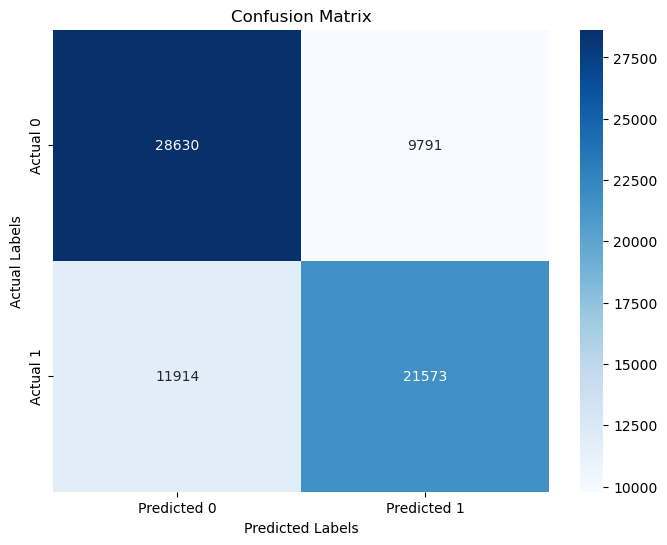

In [43]:

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

In [45]:
print("Classification Report:")
print(classification_report(y_test, y_predicted))

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73     38421
           1       0.69      0.64      0.67     33487

    accuracy                           0.70     71908
   macro avg       0.70      0.69      0.70     71908
weighted avg       0.70      0.70      0.70     71908



In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.687826807805127
Recall: 0.6442201451309464
F1 Score: 0.665309709950502


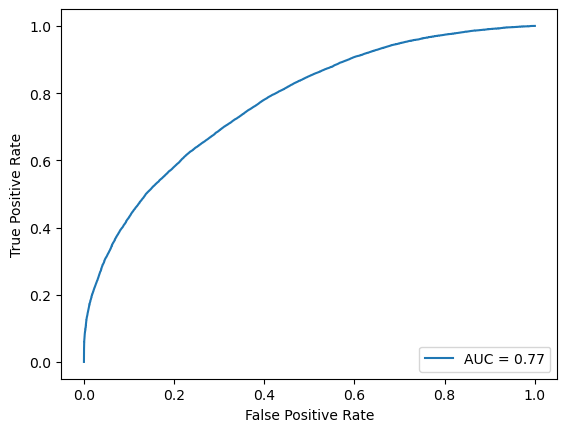

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

y_proba = model_lr.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc).plot()


In [49]:
X_train.columns

Index(['Over', 'Ball', 'Wicket', 'Innings Runs', 'Innings Wickets',
       'Target Score', 'Balls Remaining', 'Total Batter Runs',
       'Total Non Striker Runs', 'Batter Balls Faced',
       'Non Striker Balls Faced', 'Bowler Runs Conceded', 'Valid Ball',
       'Bat First_encoded', 'Bat Second_encoded', 'Batter_encoded',
       'Bowler_encoded'],
      dtype='object')

In [51]:
custom_input = pd.DataFrame({
    'Over': [12],
    'Ball': [3],
    'Wicket' : [0],
    'Innings Runs': [100],
    'Innings Wickets': [1],
    'Target Score': [191],
    'Balls Remaining': [51],
       'Total Batter Runs':[52],
    'Total Non Striker Runs':[2],
    'Batter Balls Faced': [30],
       'Non Striker Balls Faced':[3],
    'Bowler Runs Conceded':[1],
    'Valid Ball':[1],
       'Bat First_encoded':[8],
    'Bat Second_encoded':[16],
    'Batter_encoded':[184],
       'Bowler_encoded':[222]
})

prediction = model_lr.predict(custom_input)
print(f'Prediction for custom input: {label_enco.inverse_transform(prediction)}')

Prediction for custom input: ['Deccan Chargers']


In [67]:
from joblib import dump
dump(model_lr, 'model_lr.joblib')


['model_lr.joblib']

In [69]:
from joblib import load
model = load('model_lr.joblib') 